# Введение в искусственные нейронные сети
# Урок 5. Рекуррентные нейронные сети

## Содержание методического пособия:


<ol>
<li>Что такое Рекурретные нейронные сети</li>
<li>Архитектура Рекуррентных нейронных сетей</li>
<li>Пример на Keras рекуррентной нейронной сети</li>
</ol>

## Что такое Рекуррентные нейронные сети





Нейронные сети которые мы разбирали ранее относятся к классу feed forward нейронных сетей или сетей прямого распространения. Выходной сигнал слоя в этих нейронных сетях передавался напрямую в следующий слой. Однако есть задачи, в которых нам нужно обучать нейронную сеть не на единичных экземплярах наподобие изображений, а на наборах последовательностей, например последовательностей слов. 

<img src='https://drive.google.com/uc?export=view&id=1f_uoDbYksc0JQ_zc7VAPFT5P0NsQ2607'>

В рекуррентной нейронной сети выходной сигнал внутренних слоев циркулирует в этих слоях некоторое время. При обучении такой нейронной сети прежние выходные сигналы используются как дополнительные input'ы. Можно сказать, что эти дополнительные input'ы конкатенируются с "нормальными" input'ами предыдущего слоя.

Плюс рекуррентных нейронных сетей, или RNN, в том, что они обеспечивают последовательности с вариативными длинами как для входа, так и для вывода. Вот несколько примеров того, как может выглядеть рекуррентная нейронная сеть:

<img src='https://python-scripts.com/wp-content/uploads/2019/10/rrn-001.jpg'>

*Входные данные отмечены красным, нейронная сеть RNN — зеленым, а вывод — синим.*




И несколько примеров задач:
<img src='https://drive.google.com/uc?export=view&id=1QlyXHu0OjSolwLfVeF3DmPFuwOYVa3QE'>


Реккурентные нейронные сети используются например для того, чтобы научить компьютерные системы "понимать" человеческих язык, для генерации текста.
Области использования:

- *Машинный перевод* выполняется при помощи нейронных сетей с принципом «многие ко многим». Оригинальная последовательность текста подается в рекуррентную нейронную сеть, которая затем создает переведенный текст в качестве результата вывода
- *Анализ настроений* часто выполняется при помощи рекуррентных нейронных сетей с принципом «многие к одному». Этот отзыв положительный или отрицательный?
- Разновидности реккуретных нейронных используются также для построения ИИ, подобных тем, что *обыграли человека* в компьютерную игру Dota 2

В отличие от сверточных нейронных сетей реккурентные нейронные сети как правило содержат небольшое количество слоев

## Архитектура Рекуррентных нейронных сетей


Несмотря на то, что RNN могут хорошо справляться со своими задачами они не могут работать с длинными последовательностями. Эффективно они могут работать только с последовательностями состоящими из 3-4 элементов. Для, к примеру, анализа текста отзывов на предмет того положительный это отзыв или нет этого будет недостаточно. Здесь может понадобиться анализ нескольких десятков слов, чтобы сделать корректный вывод.

<img src='https://drive.google.com/uc?export=view&id=1NCfOdVRM6A1oWLxljFQVb3ldFtuoOZP8'>

Типичная классическая рекуррентная нейронная сеть использует только три набора параметров веса для выполнения требуемых подсчетов:

1. $W_{xh}$ используется для всех связок $x_t$ → $h_t$
2. $W_{hh}$ используется для всех связок $h_{t-1}$ → $h_t$
3. $W_{hy}$ используется для всех связок $h_t$ → $y_t$

$$h_t = tanh(W_{xh}x_t + W_{hh}h_{t-1})$$
$$y_t = W_{hy}h_t$$

<img src='https://drive.google.com/uc?export=view&id=1xbiwTUJC4kS5yiwgG7mcvdR282IgmnZu' width=500>

До этого в одном нейроне функция активации была:

$$h = tanh(Wx)$$
А теперь в нейроне с обратной связью:
$$h = tanh(W_{1}h + W_{2}x)$$

Вот так можно проиллюстрировать связи в нейронах RNN: <img src='https://drive.google.com/uc?export=view&id=14OzceTvk2h6d4JAS7OUvxOuALEwzlTNf' width=500>

Выход каждого нейрона подключен ко входам всех нейронов.


In [ ]:
from keras.layers import SimpleRNN, LSTM, SimpleRNNCell
from keras.models import Sequential
import tensorflow as tf

In [ ]:
tf.random.set_seed(8)

model = Sequential([
            SimpleRNN(2, activation='sigmoid',
                      return_sequences=True,
                      input_shape=(10, 1))
        ])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10, 2)             8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np
np.random.seed(5)
x = np.random.randn(10).reshape((10, 1))
model.predict(x[None])

### Реализация рекуррентной сети

Давайте попробуем сделать простую реккурентную нейронную сеть, которая будет учиться складывать числа. Для этих целей мы не будем пользоваться фреймворками для Deep Learning, чтобы посмотреть как она работает внутри.


In [ ]:
# впервую очередь подключим numpy и библиотеку copy, которая понадобиться, чтобы сделать deepcopy ряда элементов
import copy
import numpy as np
np.random.seed(0)


# вычислим сигмоиду
def sigmoid(x):
    output = 1 / (1 + np.exp(-x))
    return output

# конвертируем значение функции сигмоиды в ее производную. 
def sigmoid_deriv(output):
    return output * (1 - output)

In [ ]:
# генерация тренировочного датасета
int2binary = {}
binary_dim = 8

largest_number = pow(2, binary_dim)
binary = np.unpackbits(
    np.array([np.arange(largest_number, dtype=np.uint8)]).T,
    axis=1
)

for i in range(largest_number):
    int2binary[i] = binary[i]

display(binary, int2binary)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

{0: array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 1: array([0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8),
 2: array([0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8),
 3: array([0, 0, 0, 0, 0, 0, 1, 1], dtype=uint8),
 4: array([0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8),
 5: array([0, 0, 0, 0, 0, 1, 0, 1], dtype=uint8),
 6: array([0, 0, 0, 0, 0, 1, 1, 0], dtype=uint8),
 7: array([0, 0, 0, 0, 0, 1, 1, 1], dtype=uint8),
 8: array([0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8),
 9: array([0, 0, 0, 0, 1, 0, 0, 1], dtype=uint8),
 10: array([0, 0, 0, 0, 1, 0, 1, 0], dtype=uint8),
 11: array([0, 0, 0, 0, 1, 0, 1, 1], dtype=uint8),
 12: array([0, 0, 0, 0, 1, 1, 0, 0], dtype=uint8),
 13: array([0, 0, 0, 0, 1, 1, 0, 1], dtype=uint8),
 14: array([0, 0, 0, 0, 1, 1, 1, 0], dtype=uint8),
 15: array([0, 0, 0, 0, 1, 1, 1, 1], dtype=uint8),
 16: array([0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8),
 17: array([0, 0, 0, 1, 0, 0, 0, 1], dtype=uint8),
 18: array([0, 0, 0, 1, 0, 0, 1, 0], dtype=uint8),
 19: array([0, 0, 0, 1, 0, 0, 1, 1], dtyp

Сначала рассмотрим всё по отдельности.

In [ ]:
# входные переменные
learning_rate = 1
input_dim = 2
hidden_dim = 16
output_dim = 1


# инициализация весов нейронной сети
weigths_0 = np.random.random((input_dim, hidden_dim))
weigths_1 = np.random.random((hidden_dim, output_dim))
weigths_h = np.random.random((hidden_dim, hidden_dim))

weigths_0_update = np.zeros_like(weigths_0)
weigths_1_update = np.zeros_like(weigths_1)
weigths_h_update = np.zeros_like(weigths_h)

Берем случайный объект для обучения.

In [ ]:
# генерация простой проблемы сложения (a + b = true)
a_int = np.random.randint(largest_number / 2) # int version
a = int2binary[a_int] # бинарное кодирование

b_int = np.random.randint(largest_number / 2) # int version
b = int2binary[b_int] # бинарное кодирование

# правильный ответ
true_int = a_int + b_int
true = int2binary[true_int]

# место где мы располагаем наши лучше результаты (бинарно закодированные)
pred = np.zeros_like(true)

overallError = 0

output_grads = []
h_values = []
h_values.append(np.zeros(hidden_dim))
print('a   ', a)
print('b   ', b)
print('true', true)

a    [0 0 0 0 1 0 0 1]
b    [0 0 1 1 1 1 0 0]
true [0 1 0 0 0 1 0 1]


<img src='https://drive.google.com/uc?export=view&id=1NCfOdVRM6A1oWLxljFQVb3ldFtuoOZP8'>


$$h_t = \sigma(W_{xh}x_t + W_{hh}h_{t-1} + b_h)$$
$$y_t = W_{hy}h_t + b_y$$

Рассмотрим Forward pass.

In [ ]:
# FORWARD
print('a   ', a)
print('b   ', b)
print('true', true)
for position in range(binary_dim):
    
    # генерация input и output
    X = np.array([[a[binary_dim - position - 1], 
                   b[binary_dim - position - 1]]])
    print('X', X)
    y = np.array([[true[binary_dim - position - 1]]]).T
    print('y', y)
    
    print('h', h_values[-1])
    # внутренний слой (input + предыдущий внутренний)
    h = sigmoid(
        np.dot(X, weigths_0) + np.dot(h_values[-1], weigths_h)
    )
    print(h.shape)
    # output layer (новое бинарное представление)
    output = sigmoid(
        np.dot(h, weigths_1)
    )
    print('output', output)
    # проверка упустили ли мы что-то и если да, то как много 
    output_error = output - y
    print('output_error', output_error)

    output_grads.append(
        output_error * sigmoid_deriv(output)
    )

    # декодируем оценку
    pred[binary_dim - position - 1] = np.round(output[0][0])
    
    # сохраняем внутренний слой,
    # чтобы могли его использовать в след. итерации
    h_values.append(copy.deepcopy(h))
    print('=' * 32)

a    [0 0 0 0 1 0 0 1]
b    [0 0 1 1 1 1 0 0]
true [0 1 0 0 0 1 0 1]
X [[1 0]]
y [[1]]
h [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1, 16)
output [[0.99347749]]
output_error [[-0.00652251]]
X [[0 0]]
y [[0]]
h [[0.63386027 0.6715468  0.64628827 0.63294764 0.60435748 0.65608461
  0.60768396 0.70925592 0.72385455 0.59470289 0.68820161 0.62922533
  0.63831185 0.71618109 0.51775155 0.52176856]]
(1, 16)
output [[0.99953702]]
output_error [[0.99953702]]
X [[0 1]]
y [[1]]
h [[0.99315525 0.99650619 0.99824672 0.98099711 0.99862104 0.98677456
  0.98507713 0.994029   0.9945905  0.99653362 0.99466009 0.99395418
  0.98778101 0.99050618 0.99455284 0.98371131]]
(1, 16)
output [[0.99956667]]
output_error [[-0.00043333]]
X [[1 1]]
y [[0]]
h [[0.99956192 0.99993906 0.99997081 0.99920254 0.99998876 0.99948335
  0.99917311 0.99984328 0.99966581 0.99993042 0.99977123 0.99986292
  0.99940046 0.99953657 0.99976708 0.99914108]]
(1, 16)
output [[0.9995673]]
output_error [[0.9995673]]
X [[0 1]]
y [[0]]

Рассмотрим Backward pass.

<img src='https://drive.google.com/uc?export=view&id=1NCfOdVRM6A1oWLxljFQVb3ldFtuoOZP8'>

$$h_t = \sigma(W_{xh}x_t + W_{hh}h_{t-1} + b_h)$$
$$y_t = W_{hy}h_t + b_y$$

In [ ]:
future_h_grad = np.zeros(hidden_dim)

print('a   ', a)
print('b   ', b)
print('true', true)
print('pred', pred)

# BACKWARD
for position in range(binary_dim):
    
    X = np.array([[a[position], b[position]]])
    print('X', X)
    h = h_values[-position - 1]
    prev_h = h_values[-position - 2]
    
    # величина ошибки в output layer
    output_grad = output_grads[-position - 1]

    # величина ошибки в hidden layer
    h_grad = (
        future_h_grad.dot(weigths_h.T) \
        + output_grad.dot(weigths_1.T) \
    ) * sigmoid_deriv(h)

    # обновление всех весов
    weigths_1_update += np.atleast_2d(h).T @ output_grad
    weigths_h_update += np.atleast_2d(prev_h).T @ h_grad
    weigths_0_update += X.T @ h_grad
    
    future_h_grad = h_grad.copy()


weigths_0 -= weigths_0_update * learning_rate
weigths_1 -= weigths_1_update * learning_rate
weigths_h -= weigths_h_update * learning_rate    

a    [0 0 0 0 1 0 0 1]
b    [0 0 1 1 1 1 0 0]
true [0 1 0 0 0 1 0 1]
pred [1 1 1 1 1 1 1 1]
X [[0 0]]
X [[0 0]]
X [[0 1]]
X [[0 1]]
X [[1 1]]
X [[0 1]]
X [[0 0]]
X [[1 0]]


Все вместе.

In [ ]:
# входные переменные
learning_rate = 1
input_dim = 2
hidden_dim = 16
output_dim = 1


# инициализация весов нейронной сети
weigths_0 = np.random.random((input_dim, hidden_dim))
weigths_1 = np.random.random((hidden_dim, output_dim))
weigths_h = np.random.random((hidden_dim, hidden_dim))

weigths_0_update = np.zeros_like(weigths_0)
weigths_1_update = np.zeros_like(weigths_1)
weigths_h_update = np.zeros_like(weigths_h)


# тренировочная логика
for j in range(10000):
    
    # генерация простой проблемы сложения (a + b = true)
    a_int = np.random.randint(largest_number / 2) # int version
    a = int2binary[a_int] # бинарное кодирование

    b_int = np.random.randint(largest_number / 2) # int version
    b = int2binary[b_int] # бинарное кодирование

    # правильный ответ
    true_int = a_int + b_int
    true = int2binary[true_int]
    
    # место где мы располагаем наши лучше результаты (бинарно закодированные)
    pred = np.zeros_like(true)

    overallError = 0
    
    output_grads = []
    h_values = []
    h_values.append(np.zeros(hidden_dim))
    
    # FORWARD
    for position in range(binary_dim):
        
        # генерация input и output
        X = np.array([[a[binary_dim - position - 1], 
                       b[binary_dim - position - 1]]])
    
        y = np.array([[true[binary_dim - position - 1]]]).T
      
        # внутренний слой (input + предыдущий внутренний)
        h = sigmoid(
            np.dot(X, weigths_0) + np.dot(h_values[-1], weigths_h)
        )

        # output layer (новое бинарное представление)
        output = sigmoid(
            np.dot(h, weigths_1)
        )
        
        # проверка упустили ли мы что-то и если да, то как много 
        output_error = output - y
        output_grads.append(
            output_error * sigmoid_deriv(output)
        )
        overallError += np.abs(output_error[0])
    
        # декодируем оценку
        pred[binary_dim - position - 1] = np.round(output[0][0])
        
        # сохраняем внутренний слой,
        # чтобы могли его использовать в след. итерации
        h_values.append(copy.deepcopy(h))
    
    future_h_grad = np.zeros(hidden_dim)
    
    # BACKWARD
    for position in range(binary_dim):
        
        X = np.array([[a[position], b[position]]])
        
        h = h_values[-position - 1]
        prev_h = h_values[-position - 2]
        
        # величина ошибки в output layer
        output_grad = output_grads[-position - 1]

        # величина ошибки в hidden layer
        h_grad = (
            future_h_grad.dot(weigths_h.T) \
            + output_grad.dot(weigths_1.T) \
        ) * sigmoid_deriv(h)

        weigths_1_update += np.atleast_2d(h).T @ output_grad
        weigths_h_update += np.atleast_2d(prev_h).T @ h_grad
        weigths_0_update += X.T @ h_grad
        
        future_h_grad = h_grad.copy()
    

    weigths_0 -= weigths_0_update * learning_rate
    weigths_1 -= weigths_1_update * learning_rate
    weigths_h -= weigths_h_update * learning_rate    

    weigths_0_update *= 0
    weigths_1_update *= 0
    weigths_h_update *= 0
    
    # вывод на экран процесса обучения
    if (j % 1000 == 0):
        print(f"Error: {overallError}")
        print(f"Pred: {pred}")
        print(f"True: {true}")
        out = 0
        for index, x in enumerate(reversed(pred)):
            out += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out))
        print("------------")

Error: [1.99600086]
Pred: [1 1 1 1 1 1 1 1]
True: [1 0 1 1 1 1 1 0]
123 + 67 = 255
------------
Error: [2.43387483]
Pred: [0 0 0 0 0 0 0 0]
True: [0 1 0 1 0 0 0 0]
38 + 42 = 0
------------
Error: [2.12270501]
Pred: [1 1 1 1 1 1 1 1]
True: [1 0 0 1 1 1 1 1]
37 + 122 = 255
------------
Error: [3.53591294]
Pred: [1 0 0 0 0 0 1 1]
True: [1 0 1 1 1 0 1 0]
124 + 62 = 131
------------
Error: [0.19332125]
Pred: [0 1 1 0 1 1 0 0]
True: [0 1 1 0 1 1 0 0]
0 + 108 = 108
------------
Error: [0.08303137]
Pred: [1 0 0 0 1 1 0 0]
True: [1 0 0 0 1 1 0 0]
76 + 64 = 140
------------
Error: [0.36374014]
Pred: [0 0 1 0 1 1 1 1]
True: [0 0 1 0 1 1 1 1]
47 + 0 = 47
------------
Error: [0.14596281]
Pred: [0 0 0 0 1 0 1 1]
True: [0 0 0 0 1 0 1 1]
1 + 10 = 11
------------
Error: [0.12788186]
Pred: [1 1 0 0 0 0 1 0]
True: [1 1 0 0 0 0 1 0]
74 + 120 = 194
------------
Error: [0.10058878]
Pred: [0 1 0 0 1 0 1 0]
True: [0 1 0 0 1 0 1 0]
52 + 22 = 74
------------


Еще раз посмотрим на примеры задач и с помощью каких архитектур это можно сделать.

Задача многие к одному:

<img src='https://drive.google.com/uc?export=view&id=1BznMVNlHauw88mRY-heBgjWZVwPAJ3HR' width=650>

Задача один ко многим:

<img src='https://drive.google.com/uc?export=view&id=1j82MOyIEvbm41iLu7ISzab7FMrsDpPgO' width=650>

Задача многие ко многим:

<img src='https://drive.google.com/uc?export=view&id=1uOHQX8AnPGKY6HEDOTRJzVxCiKAHLoJy' width=650>

Здесь можно заметить проблему, что предложения могут быть очень длинными, а нужно сжать всю информацию о предыдущих словах в один блок, который представляет собой внутренний слой - переходное состояние из кодировщика в декодировщика.


## Vanishing gradient problem

Хотелось бы обрабатывать длинные последовательности текста и так же учитывать побольше контекста из предыдущих слов. (В конце предложении хорошо бы вспомнить, что происходило в начале предложения.)

Из материалов по сверточным нейронным сетям нам известна проблема исчезающего градиента. В случае с большим количеством слоев значение градиента при последовательном обновлении большого количества слоев становится все меньше и может стать настолько маленьким, что не сможет в принципе существенно изменить поведение нейронов. В рекуррентных нейронных сетях из-за сигнала циркулирующего внутри слоев это проблема становится еще острее. Причем градиент может стать не только очень маленьким, но и очень большим.



## Long Short Term Memory (LSTM)

Решить проблему исчезающего градиента призвана разновидность RNN под названием LSTM.

**Long short-term memory (LSTM) юниты** - это блоки, из которых состоят слои одной из разновидностей рекуррентной нейронной сети (RNN). Обычно LSTM юнит представляет из себя ячейку состоящую из input gate, output gate и forget gate. Эти ячейки отвественны за запоминания значений на определенные промежутки времени. RNN, состоящая из LSTM юнитов иногда называется просто LSTM. 

<img src='https://pbs.twimg.com/media/DVI6xZHVMAAjBVr.jpg' width=700>


Здесь не просто распространяется сигнал, но и происходит управление размером влияния того, что приходит из предыдущего состояния. Каждый из этих элементов можно представить как типичный искусственный нейрон, который вычисляет активацию как взвешенную сумму. Их работа сводится к регуляции потока значений через блок LSTM, поэтому они и называются ворота или затворы (gate). Задача gate'ов - открыть пошире двери или закрыть её. Есть три gate:
1. Input gate - gate входного сигнала обеспечивает возможность меньше влиять предыдущему состоянию на текущее состояние
2. Output gate - gate выходного сигнала
3. Forget gate - gate забывания управляет очисткой памяти, скоростью забывания предыдущего состояния. Хранить эту информацию данная ячейка может очень долго.


Из-за этих настраиваемых параметров, LSTM более сложная модель по сравнению с RNN. Значит она требует больше времени, больше примеров.

Понятие долгой памяти в названии возникло из-за того, что они могут запоминать информацию на более длинный период времени, чем обычная RNN. LSTM хорошо подходит для классификации процессов и предсказания временных последовательностей неизвестного размера и неизвестных промежутков между важными событиями. С технической точки зрения это достигается за счет ликвидации проблем связанных с exploding и vanishing gradient'ами. Ошибки сохраняются в самом слое, что позволяет передавать градиенты в следующие слои практически без потерь.

### Компоненты LSTM.  
Ниже приведен список компонентов из которых состоит ячейка LSTM:






Ключевой момент в LSTM - это **состояние ячейки** - горизонтальная линия сверху диаграммы. Сигнал протекает из ячейки в ячейку с небольшими линейными преобразования.

<img src='https://drive.google.com/uc?export=view&id=1OCGD3pD59gatmH54ML8UEzv2OUvpU5Rf'>



У LSTM есть способность удалять или добавлять информацию в состояние ячейки с помощью gate'ов.

Гейты пропускают информацию по возможности. Они состоят из сигмоиды и перемножения матриц. Выход с сигмоиды от 0 до 1 описывает с какой силой сигнал может пройти дальше. Значения 0 значит "ничего не пройдет", а 1 - "пропускай всё".

У LSTM есть три гейта, чтобы сохранять и контролировать состояние ячейки.

**Forget gate**

Первый шаг в LSTM - это решить, от какой информации мы хотим избавиться. Это решение принимает слой с сигмоидой, который называется "forget gate layer." (гейт забывания). Он принимает во внимание $h_{t−1}$ и $x_t$, а на выходе даёт значение между 0 и 1 для каждого числа в состоянии ячейки $C_{t−1}$. 1 значит "полностью сохрани это", а 0 - "полностью забудь это".

Пример забывания - языковая модель пытается предсказать следующее слово базируясь на предыдущих. Здесь модель может запоминать род объекта, чтобы использовать правильное образование слов. Когда мы видим новый объект, то нужно забыть род предыдущего объекта. *(Животное не переходило дорогу, потому что оно устало)*

<img src='https://drive.google.com/uc?export=view&id=1oYGrHhH6y4_DtwRcKJDjzvYVChPEMblR'>

**Input gate**

Следующий шаг - решить, какую информацию мы должны хранить в состоянии ячейки. Шаг состоит из двух частей. Первая - слой сигмоиды, называемый "input gate layer" (входной гейт), который решает какие значения будут обновляться. Вторая - слой с тангенсом, который создает вектор значений $\tilde{C}_t$, которые будут добавляться к состоянию ячейки.

С примером языковой модели, мы бы хотели добавлять род нового объекта в состояние ячейки, чтобы заменить старый род, который мы забудем. *(Животное не переходило дорогу, потому что оно устало)*

<img src='https://drive.google.com/uc?export=view&id=1kb4hs0Y1cLb55sl-iRPsxMuNzLlu5qXb'>

**Update cell state**

Сейчас самое время, чтобы обновить старое состояние $C_{t−1}$ в новое состояние $C_t$. Предыдущие шаги уже решили, что делать, нужно только сделать это.

Умножаем старое состояние на $f_t$, тем самым забывая те вещи, которые хотели забыть, затем прибавляем $i_t∗\tilde{C_t}$. Это новое значение состояния ячейки, которое отмасштабировано в зависимоcти от того, насколько мы хотим обновить новое значение.

В языковой модели, это момент, где мы выкидываем информацию о роде старого объекта и добавляем новую информацию о роде нового объекта. *(Животное не переходило дорогу, потому что оно устало)*


<img src='https://drive.google.com/uc?export=view&id=1oKlTuYYRwdnvfMUQW0FjHRWgtHy0xl1M'>

**Output gate**

Наконец-то нам нужно решить, что мы отправим на выход. Выход будет базироваться на состоянии ячейки, но с небольшой фильтрацией. Во-первых, прогоним входной сигнал через сигмоиду, которая решает с какой силой дальше пропускать сигнал, во-вторых, прогоняем состояние ячейки через тангенс и умножаем это на сигмоиду, чтобы пропускать дальше только то, что мы решили пропустить.

Для языковой модели, которая видит только объект, здесь можем пропустить информацию, связанную с глаголом. Например, на выходе может быть полезно число множественной или единственное у объекта, чтобы знать в какую форму нужно поставить глагол. *(Животное не переходило дорогу, потому что оно устало)*

<img src='https://drive.google.com/uc?export=view&id=12SBxiBO-knE250rVlTxSYkmGWLjzFHL0'>

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

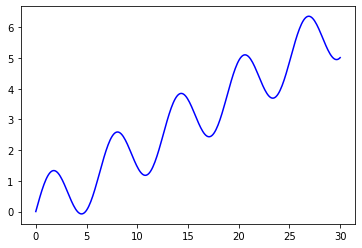

In [ ]:
N = 300
t = np.linspace(0, 30, N).reshape((N, 1))
x_t = np.sin(t) + t * 0.2

x_len = 5  # длина истории
n = 2  # длина вектора данных

plt.plot(t, x_t, '-b');

In [ ]:
input = Input(shape=(x_len, 2))
output = LSTM(units=32, dropout=0.0)(input)
output = Dense(1, activation='linear')(output)

model = Model(input, output)
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['mse'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 2)]            0         
                                                                 
 lstm (LSTM)                 (None, 32)                4480      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = []
y = []

for i in range(N - x_len - 1):
    X.append(np.concatenate(
                (t[i: x_len + i], x_t[i: x_len + i])
        ).reshape((2, x_len)).T
    )
    y.append(x_t[i + x_len])

X = np.array(X)
y = np.array(y)

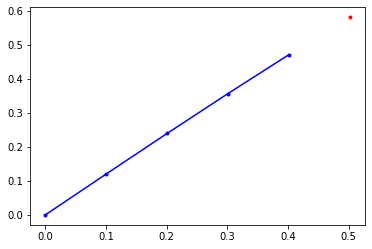

In [ ]:
plt.plot(X[0][:, 0], X[0][:, 1], '.-b')
plt.plot(t[x_len], y[0], '.r');

In [ ]:
%%time
test_n = 200
model.fit(X[:test_n], y[:test_n],
          epochs=20,
          validation_data=(X[test_n:], y[test_n:])
          )

Epoch 1/20
7/7 [==============================] - 9s 213ms/step - loss: 10.8450 - mse: 10.8450 - val_loss: 37.4269 - val_mse: 37.4269
Epoch 2/20
7/7 [==============================] - 0s 28ms/step - loss: 9.0610 - mse: 9.0610 - val_loss: 34.5213 - val_mse: 34.5213
Epoch 3/20
7/7 [==============================] - 0s 26ms/step - loss: 7.3205 - mse: 7.3205 - val_loss: 31.1472 - val_mse: 31.1472
Epoch 4/20
7/7 [==============================] - 0s 14ms/step - loss: 5.7053 - mse: 5.7053 - val_loss: 26.7280 - val_mse: 26.7280
Epoch 5/20
7/7 [==============================] - 0s 23ms/step - loss: 4.2618 - mse: 4.2618 - val_loss: 21.8985 - val_mse: 21.8985
Epoch 6/20
7/7 [==============================] - 0s 23ms/step - loss: 3.1282 - mse: 3.1282 - val_loss: 18.2032 - val_mse: 18.2032
Epoch 7/20
7/7 [==============================] - 0s 23ms/step - loss: 2.3617 - mse: 2.3617 - val_loss: 15.1252 - val_mse: 15.1252
Epoch 8/20
7/7 [==============================] - 0s 20ms/step - loss: 1.8552 - 

In [ ]:
model.evaluate(X[:test_n], y[:test_n])

7/7 [==============================] - 0s 3ms/step - loss: 0.1163 - mse: 0.1163


[0.11634553968906403, 0.11634553968906403]

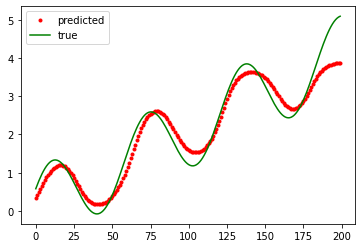

In [ ]:
y_pred = model.predict(X[:test_n])

plt.plot(y_pred, '.r', label='predicted')
plt.plot(y[:test_n], 'g', label='true')
plt.legend();

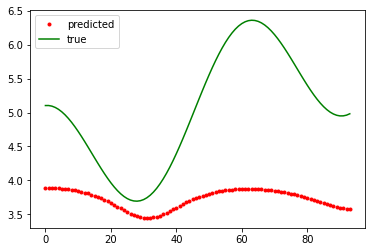

In [ ]:
y_pred = model.predict(X[test_n:])

plt.plot(y_pred, '.r', label='predicted')
plt.plot(y[test_n:], 'g', label='true')
plt.legend();

## Gated Recurrent Unit (GRU)

Теперь, когда мы знаем как работает LSTM, давайте бегло взглянем на то, как работате GRU. GRU это более новое поколение рекуррентных нейронных сетей и оно во многом похоже на LSTM. Но есть определенная разница. В GRU не используется состояние ячейки и используется скрытое состояние для передачи информации. В GRU также есть два затвора - reset gate и update gate.

<img src='https://drive.google.com/uc?export=view&id=1dueNTzgtKPh3giYl-8PnJIR1uMI7dKLL' width=700>

Update Gate обновляет затворы действуя подобно forget и input gate, которые используются в LSTM. Он решает какая информация будет отброшена, а какая новая информация будет добавлена. Reset Gate - это другой затвор, использующийся для принятия решения, как много прошлой информации будет забыто. В этих особенностях и заключается архитектура GRU. GRU имеет меньше тензорных операций и соответственно тренеруется быстре, чем LSTM. Однако нельзя сказать точно, какая архитектура лучше. Исследователи и инженеры пытаются определить, что в каждом конкретном случае подойдет больше. Если говорить упрощенно, то GRU может подойти тогда, когда важнее скорость, чем точность, а LSTM тогда, когда важнее точность, чем скорость. 

<img src='https://drive.google.com/uc?export=view&id=1nwWR-inD0dbp2M5m-lUyr9l50Q2lWPJM'>

<img src='https://drive.google.com/uc?export=view&id=1JELilnaBhXs70OQISNs0QZWKVLr7fYPp' width=400>

In [ ]:
from tensorflow.keras.layers import GRU


input = Input(shape=(x_len, 2))
output = GRU(units=32, dropout=0.0)(input)
output = Dense(1, activation='linear')(output)

model = Model(input, output)
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 2)]            0         
                                                                 
 gru (GRU)                   (None, 32)                3456      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
test_n = 200
model.fit(X[:test_n], y[:test_n],
          epochs=20,
          validation_data=(X[test_n:], y[test_n:])
          )

Epoch 1/20
7/7 [==============================] - 2s 62ms/step - loss: 5.1180 - mse: 5.1180 - val_loss: 19.0334 - val_mse: 19.0334
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 2.7345 - mse: 2.7345 - val_loss: 13.2495 - val_mse: 13.2495
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 1.5502 - mse: 1.5502 - val_loss: 9.5074 - val_mse: 9.5074
Epoch 4/20
7/7 [==============================] - 0s 7ms/step - loss: 1.1719 - mse: 1.1719 - val_loss: 7.4578 - val_mse: 7.4578
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 1.0514 - mse: 1.0514 - val_loss: 6.3510 - val_mse: 6.3510
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 0.9199 - mse: 0.9199 - val_loss: 5.8634 - val_mse: 5.8634
Epoch 7/20
7/7 [==============================] - 0s 9ms/step - loss: 0.7894 - mse: 0.7894 - val_loss: 5.5822 - val_mse: 5.5822
Epoch 8/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6774 - mse: 0.6774 - val_lo

In [ ]:
model.evaluate(X[:test_n], y[:test_n])

7/7 [==============================] - 0s 3ms/step - loss: 0.0975 - mse: 0.0975


[0.09753827750682831, 0.09753827750682831]

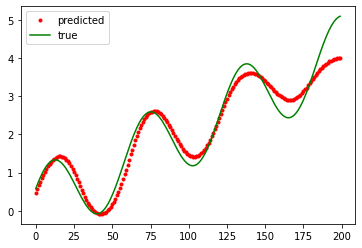

In [ ]:
y_pred = model.predict(X[:test_n])

plt.plot(y_pred, '.r', label='predicted')
plt.plot(y[:test_n], 'g', label='true')
plt.legend();

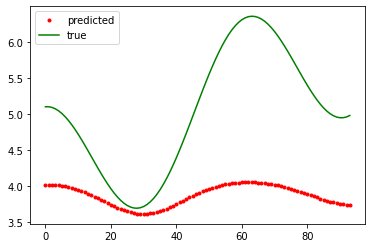

In [ ]:
y_pred = model.predict(X[test_n:])

plt.plot(y_pred, '.r', label='predicted')
plt.plot(y[test_n:], 'g', label='true')
plt.legend();

## Attention

С какими проблемами еще можем столкнуться? Снова поговорим про машинный перевод.

Примеры из статьи [Google's Neural Machine Translation System: Bridging the Gap between Human and Machine Translation](https://arxiv.org/abs/1609.08144).

<img src='https://drive.google.com/uc?export=view&id=1uOHQX8AnPGKY6HEDOTRJzVxCiKAHLoJy' width=450>

Нужно сжать всю информацию о предыдущих словах в один блок, который представляет собой внутренний слой - переходное состояние из кодировщика в декодировщика, что очень сложная задача, которая приводит к недообучению.

И одно из возможных решений - это настакать слои LSTM, один слой LSTM создает вход для другого слоя LSTM:

<img src='https://drive.google.com/uc?export=view&id=1yrBxb5DXZA-LNwNWQdmuF4TNNXqTfNpJ' width=450>

Но эту вещь очень тяжело обучать, если добавлять всё больше LSTM слоем, то снова встречаемся с проблемой затухающих градиентов, плюсом, всё равно нужно сжимать всю информацию в последние блоки - это наш bottleneck (узкое место, горлышко бутылки) между кодировщик и декодировщиком.


И решение этой проблемы - Attention слой. Вместо того, чтобы сжимать всю информацию из всех временных ячеек в одно скрытое состояние, можно дать доступ декодировщику ко всей истории. Но получаем очень слишком много информации, которую нужно учитывать, поэтому мы будем обращать свое внимание только на подвыборку этих ячеек.

Будем учитывать, какая часть предложения на английском языке важна для предсказания слова на французском языке. Подсчет такого распределения достигается получением оценки релевантности каждого слова в предложении для получения нового слова.

<img src='https://drive.google.com/uc?export=view&id=1GAVWyShMSXELaz1f-_e4c9rAeDoJ3QE_' width=450>


**Как использовать эти оценки релевантности?**

Подсчитываются оценки для каждого скрытого состояния и образуют собой взвешанную сумму внимания. А потом эта сумма передается, как еще один вход в декодировщик.

<img src='https://drive.google.com/uc?export=view&id=1a72Ake6Ai2SdkZ9cQpqmq6-ebjblcQ34' width=450>

Можно [провизуализировать](https://distill.pub/2016/augmented-rnns/#attentional-interfaces), какое внимание уделяется каждому слову из предложения:

<img src='https://drive.google.com/uc?export=view&id=1WcRiqQ5fG7kQPTbISHgRYYwbBbLetDOL' width=800>

А ещё слои внимания можно добавлять и не только к текстам, но и к картинкам.

<img src='https://drive.google.com/uc?export=view&id=1i48NmZMXUneeUwW339tSgvrGU_VvLh9H'>



## Bidirectional LSTM

https://keras.io/examples/nlp/bidirectional_lstm_imdb/

Еще одна проблема с LSTM - они учитывают только контекст до слова. Почему это может быть плохо? К примеру, слово "quick" может значит очень много вещей и смысл слова будет понятен только после прочтения слов, которые идут после него.

Идея решения проблемы - использовать LSTM слой для прямого контекста и еще слой LSTM для обратного контекста - это будет двунаправленный слой LSTM (Bidirectional LSTM).



<img src='https://drive.google.com/uc?export=view&id=1kCGsUWhUjIoIAquvE7FjaAbYjAQdsyW7' width=550>

А так будет выглядеть сеть, если всё объединить вместе.

<img src='https://drive.google.com/uc?export=view&id=1FdhBWJFQKEpM8lUZ-E2hlTWCmNj361Lg' width=450>




## Практика

### IMDB

Теперь давайте попробуем с помощью Keras построить LSTM нейронную сеть для оценки настроений отзывов на IMDB.

Данный датасет слишком мал, чтобы преимущества LSTM проявились, однако в учебных целях он подойдет.

В тренировке рекуррентных нейронных сетей важную роль играет размер batch, но еще большую роль играет выбор функций loss и optimizer.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 10000

# обрезаем тексты после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 50 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

Загрузка данных...
17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
[len(i) for i in X_train[:5]]

[218, 189, 141, 550, 147]

In [ ]:
X_train[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
index2word = {v:k for k, v in imdb.get_word_index().items()}

for idx_word in X_train[0]:
    print(index2word[idx_word], end=' ')

1654784/1641221 [==============================] - 0s 0us/step
the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while histor

In [ ]:
print('Pad последовательности (примеров в x единицу времени)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad последовательности (примеров в x единицу времени)
X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [ ]:
X_train[0]

array([  15,  256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,
        530,  476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,
        104,   88,    4,  381,   15,  297,   98,   32, 2071,   56,   26,
        141,    6,  194, 7486,   18,    4,  226,   22,   21,  134,  476,
         26,  480,    5,  144,   30, 5535,   18,   51,   36,   28,  224,
         92,   25,  104,    4,  226,   65,   16,   38, 1334,   88,   12,
         16,  283,    5,   16, 4472,  113,  103,   32,   15,   16, 5345,
         19,  178,   32], dtype=int32)

In [ ]:
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,  591,  202,   14,   31,    6,  717,   10,   10,    2,
          2,    5,    4,  360,    7,    4,  177, 5760,  394,  354,    4,
        123,    9, 1035, 1035, 1035,   10,   10,   13,   92,  124,   89,
        488, 7944,  100,   28, 1668,   14,   31,   23,   27, 7479,   29,
        220,  468,    8,  124,   14,  286,  170,    8,  157,   46,    5,
         27,  239,   16,  179,    2,   38,   32,   25, 7944,  451,  202,
         14,    6,  717], dtype=int32)

In [ ]:
index = imdb.get_word_index()
len(index)

88584

In [ ]:
np.max(X_train)

9999

In [ ]:
max_features

10000

"Мешок слов" - Bag of Word (BoW) 

http://lab314.brsu.by/kmp-lite/kmp2/JOB/CModel/BoW-Q.htm





In [ ]:
X_train[0]

array([  15,  256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,
        530,  476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,
        104,   88,    4,  381,   15,  297,   98,   32, 2071,   56,   26,
        141,    6,  194, 7486,   18,    4,  226,   22,   21,  134,  476,
         26,  480,    5,  144,   30, 5535,   18,   51,   36,   28,  224,
         92,   25,  104,    4,  226,   65,   16,   38, 1334,   88,   12,
         16,  283,    5,   16, 4472,  113,  103,   32,   15,   16, 5345,
         19,  178,   32], dtype=int32)

In [ ]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
 
X_train_bow = vectorize(X_train, dimension=max_features)
X_test_bow = vectorize(X_test, dimension=max_features)

In [ ]:
X_train_bow[0, :10]

array([0., 0., 1., 0., 1., 1., 1., 1., 0., 0.])

In [ ]:
print('Построение модели...')
model_bow = Sequential()

model_bow.add(Dense(128, activation='relu', input_shape=(max_features, )))
model_bow.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимизаторы и другие конфигурации
model_bow.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model_bow.summary()

Построение модели...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1280128   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,257
Trainable params: 1,280,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Процесс обучения...')
model_bow.fit(X_train_bow[:], y_train[:],
              batch_size=batch_size,
              epochs=3,
              validation_data=(X_test_bow, y_test))

Процесс обучения...
Epoch 1/3
500/500 [==============================] - 5s 8ms/step - loss: 0.4030 - accuracy: 0.8138 - val_loss: 0.3652 - val_accuracy: 0.8359
Epoch 2/3
500/500 [==============================] - 3s 6ms/step - loss: 0.2546 - accuracy: 0.8970 - val_loss: 0.3961 - val_accuracy: 0.8245
Epoch 3/3
500/500 [==============================] - 3s 5ms/step - loss: 0.1699 - accuracy: 0.9325 - val_loss: 0.4777 - val_accuracy: 0.8208


In [ ]:
print('Валидация модели')
score, acc = model_bow.evaluate(X_test_bow, y_test, batch_size=batch_size)

Валидация модели
500/500 [==============================] - 1s 3ms/step - loss: 0.4777 - accuracy: 0.8208


Обучение на последовательности

In [ ]:
def vectorize_seq(sequences, xLen=100, step=1):
    results = np.zeros((len(sequences), xLen, 1))
    for i, sequence in enumerate(sequences):
        for j in range(xLen):
            results[i, j,:] = sequence[j]
    return results
 
X_train_seq = vectorize_seq(X_train, xLen=maxlen)
X_test_seq = vectorize_seq(X_test, xLen=maxlen)

In [ ]:
X_test.shape, X_test_seq.shape

((25000, 80), (25000, 80, 1))

In [ ]:
display(X_train[0, :10], X_train_seq[0, :10])

array([  15,  256,    4,    2,    7, 3766,    5,  723,   36,   71],
      dtype=int32)

array([[1.500e+01],
       [2.560e+02],
       [4.000e+00],
       [2.000e+00],
       [7.000e+00],
       [3.766e+03],
       [5.000e+00],
       [7.230e+02],
       [3.600e+01],
       [7.100e+01]])

In [ ]:
print('Построение модели...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, 1)))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимизаторы и другие конфигурации
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Построение модели...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Процесс обучения...')
model.fit(X_train_seq, y_train,
          batch_size=100,
          epochs=5,
          validation_data=(X_test_seq, y_test))

Процесс обучения...
Epoch 1/5
250/250 [==============================] - 6s 15ms/step - loss: 0.6905 - accuracy: 0.5329 - val_loss: 0.6891 - val_accuracy: 0.5365
Epoch 2/5
250/250 [==============================] - 3s 12ms/step - loss: 0.6862 - accuracy: 0.5487 - val_loss: 0.6954 - val_accuracy: 0.5130
Epoch 3/5
250/250 [==============================] - 3s 12ms/step - loss: 0.6861 - accuracy: 0.5481 - val_loss: 0.6856 - val_accuracy: 0.5549
Epoch 4/5
250/250 [==============================] - 2s 9ms/step - loss: 0.6852 - accuracy: 0.5521 - val_loss: 0.6846 - val_accuracy: 0.5519
Epoch 5/5
250/250 [==============================] - 3s 12ms/step - loss: 0.6852 - accuracy: 0.5531 - val_loss: 0.6850 - val_accuracy: 0.5533


In [ ]:
print('Валидация модели')
score, acc = model.evaluate(X_test_seq, y_test, batch_size=batch_size)

Валидация модели
500/500 [==============================] - 2s 4ms/step - loss: 0.6850 - accuracy: 0.5533


Сеть обучилась не очень хорошо, можно сделать её посложнее или просто пообучать подольше, но на самом деле так не делают, передавать индексы слов не самая лучшая затея. Это решается по-другому, с помощью **эмбеддингов**.

Эмбэддинг - векторное представление слов.

<img src='https://drive.google.com/uc?export=view&id=13DNqtvToTyJritI3oRbyanrnTo1I-H60'>

In [ ]:
print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Построение модели...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Процесс обучения...')
model.fit(X_train, y_train,
          batch_size=128,
          epochs=3,
          validation_data=(X_test, y_test))

Процесс обучения...
Epoch 1/3
196/196 [==============================] - 5s 18ms/step - loss: 0.4519 - accuracy: 0.7798 - val_loss: 0.3931 - val_accuracy: 0.8337
Epoch 2/3
196/196 [==============================] - 2s 13ms/step - loss: 0.2888 - accuracy: 0.8835 - val_loss: 0.3721 - val_accuracy: 0.8361
Epoch 3/3
196/196 [==============================] - 2s 12ms/step - loss: 0.2238 - accuracy: 0.9113 - val_loss: 0.4364 - val_accuracy: 0.8339


In [ ]:
print('Валидация модели')
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

Валидация модели
500/500 [==============================] - 2s 4ms/step - loss: 0.4364 - accuracy: 0.8339


### Временной ряд

Давайте посмотрим пример, в котором будут использоваться временные ряды. Читаем данные из файла со значениями цены нефти марки BRENT

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.layers import Flatten

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1LyP8K5557iKZPLFG2nsh-GC2v9y-nJCf' -O BRENT2019.csv

--2022-02-19 16:44:16--  https://drive.google.com/uc?export=download&id=1LyP8K5557iKZPLFG2nsh-GC2v9y-nJCf
Resolving drive.google.com (drive.google.com)... 173.194.211.113, 173.194.211.139, 173.194.211.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ft6gpkv5i39ig8d75mkhvk146laep4tc/1645289025000/14904333240138417226/*/1LyP8K5557iKZPLFG2nsh-GC2v9y-nJCf?e=download [following]
--2022-02-19 16:44:16--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ft6gpkv5i39ig8d75mkhvk146laep4tc/1645289025000/14904333240138417226/*/1LyP8K5557iKZPLFG2nsh-GC2v9y-nJCf?e=download
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-0s-c0-docs.googleusercontent.com (doc-0s-c0

In [ ]:
!ls

BRENT2019.csv  sample_data


In [ ]:
df = pd.read_csv('BRENT2019.csv')
df.head()

,Дата,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
0,2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
1,2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2,2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
3,2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
4,2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [ ]:
df.shape

(2667, 12)

Отбросим первый столбец, т.к. признаки [year,	month,	dayofmonth,	quarter,	dayofyear,	weekofyear,	dayofweek,	is_holiday,	is_prev_holiday,	is_next_holiday] его представляют.

In [ ]:
data = df.iloc[:, 1:]
data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
0,76.37,2010,9,1,3,244,35,2,0,0,0
1,76.89,2010,9,2,3,245,35,3,0,0,0
2,76.57,2010,9,3,3,246,35,4,0,0,0
3,76.62,2010,9,4,3,247,35,5,0,0,0
4,76.63,2010,9,5,3,248,35,6,0,1,0


Разбиваем выборку на обучение и на тест.

In [ ]:
train_size = 2000


# список признаков, по которым будем учить
features = ['Значение', 'year', 'month', 
            'dayofmonth',
            'quarter', 'dayofyear', 'weekofyear', 'dayofweek',
            'is_holiday', 'is_prev_holiday', 'is_next_holiday'
            ]


# отступ теста от тренировки
bias = 10


# делим
train_data = data.iloc[:train_size][features]
val_data = data.iloc[train_size + bias:][features]

train_data.shape, val_data.shape

((2000, 11), (657, 11))

Создаем данные для обучения

In [ ]:
features = train_data.columns[1:]
target = train_data.columns[0]

In [ ]:
scaler = StandardScaler()

train_data[features] = scaler.fit_transform(train_data[features])
val_data[features] = scaler.transform(val_data[features])

train_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
0,76.37,-1.745239,0.722603,-1.671876,0.452662,0.583075,0.570751,-0.263439,-0.172818,-0.164989,-0.175863
1,76.89,-1.745239,0.722603,-1.558131,0.452662,0.592515,0.570751,0.272007,-0.172818,-0.164989,-0.175863
2,76.57,-1.745239,0.722603,-1.444387,0.452662,0.601956,0.570751,0.807453,-0.172818,-0.164989,-0.175863
3,76.62,-1.745239,0.722603,-1.330642,0.452662,0.611396,0.570751,1.342899,-0.172818,-0.164989,-0.175863
4,76.63,-1.745239,0.722603,-1.216897,0.452662,0.620837,0.570751,1.878345,-0.172818,6.061011,-0.175863


Формируем параметры для генерации выборки

In [ ]:
# длина истории
x_len = 7

# горизонт предсказания
future = 1

# параметры модели для обучения
learning_rate = 0.001
batch_size = 32
epochs = 10

In [ ]:
start = x_len + future
end = start + train_size

print(start, end)

X_train = train_data[features].values
y_train = data.iloc[start:end][target].values


x_end = len(val_data) - x_len - future
label_start = len(train_data) + bias + x_len + future
print(x_end, label_start)

X_val = val_data.iloc[:x_end][features].values
y_val = data.iloc[label_start:][target].values

8 2008
649 2018


In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2000, 10), (2000,), (649, 10), (649,))

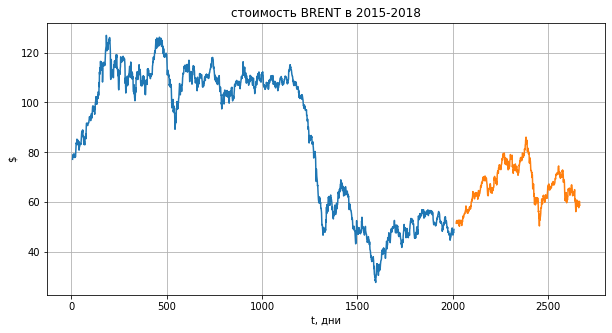

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data.index[x_len:y_train.shape[0]+x_len],y_train[:])
plt.plot(data.index[y_train.shape[0]+x_len+bias+future:],y_val[:])
plt.grid('on')
plt.xlabel('t, дни')
plt.ylabel('$')
plt.title('стоимость BRENT в 2015-2018')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

dataset_train = timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

dataset_val = timeseries_dataset_from_array(
    X_val,
    y_val,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

In [ ]:
for batch in dataset_train.take(1):
    inputs, targets = batch
    print("Input shape:", inputs.shape)
    print(inputs[1])
    print("Target shape:", targets.shape)
    print(targets[1])

Input shape: (32, 7, 10)
tf.Tensor(
[[-1.7452388   0.72260267 -1.55813134  0.45266166  0.5925154   0.5707507
   0.27200661 -0.17281816 -0.16498899 -0.17586311]
 [-1.7452388   0.72260267 -1.44438667  0.45266166  0.60195592  0.5707507
   0.80745269 -0.17281816 -0.16498899 -0.17586311]
 [-1.7452388   0.72260267 -1.330642    0.45266166  0.61139644  0.5707507
   1.34289878 -0.17281816 -0.16498899 -0.17586311]
 [-1.7452388   0.72260267 -1.21689733  0.45266166  0.62083696  0.5707507
   1.87834486 -0.17281816  6.06101056 -0.17586311]
 [-1.7452388   0.72260267 -1.10315266  0.45266166  0.63027748  0.63692085
  -1.33433164  5.78642883 -0.16498899 -0.17586311]
 [-1.7452388   0.72260267 -0.989408    0.45266166  0.63971801  0.63692085
  -0.79888556 -0.17281816 -0.16498899  5.6862407 ]
 [-1.7452388   0.72260267 -0.87566333  0.45266166  0.64915853  0.63692085
  -0.26343947 -0.17281816 -0.16498899 -0.17586311]], shape=(7, 10), dtype=float64)
Target shape: (32,)
tf.Tensor(78.41, shape=(), dtype=float64)

**сеть:  LSTM слои + Conv1D + Dense слой**

In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D

early_stop = EarlyStopping(monitor='val_mae', patience=5)


model = Sequential()

model.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
               return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Conv1D(64, 3, activation='linear'))
model.add(Conv1D(64, 1, activation='linear'))
model.add(Flatten())
model.add(Dense(3, activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             5504      
                                                                 
 lstm_4 (LSTM)               (None, 7, 32)             8320      
                                                                 
 conv1d (Conv1D)             (None, 5, 64)             6208      
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 64)             4160      
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 963       
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop])

Epoch 1/10
63/63 [==============================] - 11s 24ms/step - loss: 6931.6826 - mae: 72.9102 - val_loss: 1759.5117 - val_mae: 36.2132
Epoch 2/10
63/63 [==============================] - 1s 12ms/step - loss: 745.0959 - mae: 22.2325 - val_loss: 1848.7197 - val_mae: 40.9756
Epoch 3/10
63/63 [==============================] - 1s 12ms/step - loss: 433.2526 - mae: 17.0585 - val_loss: 1889.9988 - val_mae: 41.8957
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 387.8305 - mae: 16.0680 - val_loss: 1856.4951 - val_mae: 41.6842
Epoch 5/10
63/63 [==============================] - 1s 12ms/step - loss: 341.2285 - mae: 15.0297 - val_loss: 1764.2290 - val_mae: 40.7191
Epoch 6/10
63/63 [==============================] - 1s 12ms/step - loss: 312.0384 - mae: 14.5431 - val_loss: 1644.4252 - val_mae: 39.3453


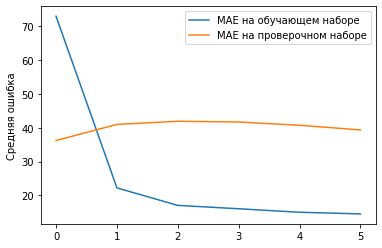

In [ ]:
plt.plot(history.history['mae'][:], 
         label='MAE на обучающем наборе')
plt.plot(history.history['val_mae'][:], 
         label='MAE на проверочном наборе')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
hist_val = history.history['val_mae']
hist_train = history.history['mae']

Epoch 1/10
63/63 [==============================] - 1s 12ms/step - loss: 301.1107 - mae: 14.5000 - val_loss: 1510.7158 - val_mae: 37.7064
Epoch 2/10
63/63 [==============================] - 1s 12ms/step - loss: 320.0136 - mae: 15.0805 - val_loss: 1373.4673 - val_mae: 35.9159
Epoch 3/10
63/63 [==============================] - 1s 12ms/step - loss: 374.9473 - mae: 16.2981 - val_loss: 1248.4012 - val_mae: 34.1844
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 447.3504 - mae: 17.4337 - val_loss: 1148.2113 - val_mae: 32.7228
Epoch 5/10
63/63 [==============================] - 1s 12ms/step - loss: 518.2791 - mae: 18.1460 - val_loss: 1063.2561 - val_mae: 31.4392
Epoch 6/10
63/63 [==============================] - 1s 13ms/step - loss: 590.5215 - mae: 18.9010 - val_loss: 969.3930 - val_mae: 29.9655
Epoch 7/10
63/63 [==============================] - 1s 12ms/step - loss: 680.4899 - mae: 20.2062 - val_loss: 856.0704 - val_mae: 28.0621
Epoch 8/10
63/63 [==================

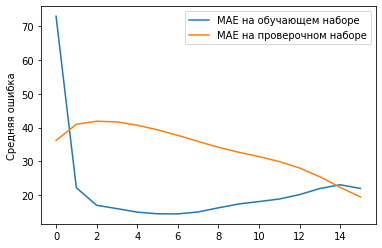

In [ ]:
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop])

hist_val.extend(history.history['val_mae'][:])
hist_train.extend(history.history['mae'][:])


plt.plot(hist_train, 
         label='MAE на обучающем наборе')
plt.plot(hist_val, 
         label='MAE на проверочном наборе')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

Проверяем результаты:

- строим предсказание
- рисуем прогноз для тестовой части 
- рисуем прогноз по тренировочной части

In [ ]:
pred = model.predict(dataset_train).flatten()
pred_val = model.predict(dataset_val).flatten()

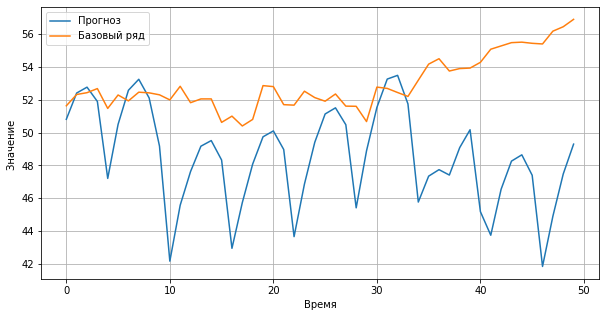

In [ ]:
start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred_val[future + start: future + start + step], 
         label='Прогноз')
plt.plot(y_val.flatten()[start: start+step], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение ')

plt.legend()
plt.show()

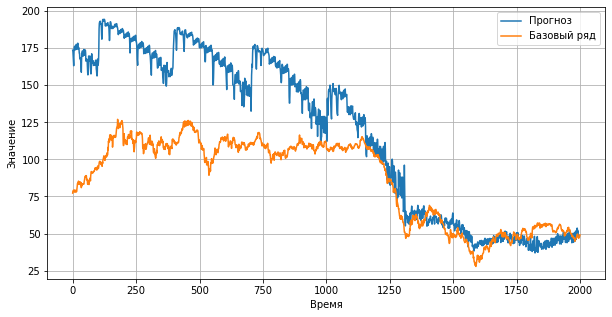

In [ ]:
start = 0

plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred[future + start: future + train_size], 
         label='Прогноз')
plt.plot(y_train.flatten()[start: train_size], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

### Генерация текста

#### Cонеты Шекспира

In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt -O sonnets.txt

--2022-02-19 16:44:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 108.177.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘sonnets.txt’

sonnets.txt         100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2022-02-19 16:44:43 (112 MB/s) - ‘sonnets.txt’ saved [93578/93578]



In [ ]:
# Читаем текст
data = open('sonnets.txt').read()
corpus = data.lower().split("\n")
corpus[:10]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,']

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


# Создаем объект для токенизации
total_words = 1000
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(corpus)

# tokenizer.index_word

Исполним токенизацию и кодирование

In [ ]:
print(corpus[0])
print(tokenizer.texts_to_sequences([corpus[0]]))
print(tokenizer.word_index['from'], tokenizer.word_index['fairest'])

from fairest creatures we desire increase,
[[34, 417, 877, 166, 213, 517]]
34 417


In [ ]:
# создадим последовательность токенов
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		sequence = token_list[:i+1]
		input_sequences.append(sequence)
input_sequences[:10]

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517],
 [8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156]]

In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[:10]

11


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  34, 417],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34, 417, 877],
       [  0,   0,   0,   0,   0,   0,   0,  34, 417, 877, 166],
       [  0,   0,   0,   0,   0,   0,  34, 417, 877, 166, 213],
       [  0,   0,   0,   0,   0,  34, 417, 877, 166, 213, 517],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 878],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8, 878, 134],
       [  0,   0,   0,   0,   0,   0,   0,   8, 878, 134, 351],
       [  0,   0,   0,   0,   0,   0,   8, 878, 134, 351, 102],
       [  0,   0,   0,   0,   0,   8, 878, 134, 351, 102, 156]],
      dtype=int32)

In [ ]:
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = to_categorical(label, num_classes=total_words)
label.shape

(12880, 1000)

In [ ]:
predictors[0], np.argmax(label[0])

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34], dtype=int32), 417)

Создаем сеть

In [ ]:
from keras.layers import Dropout, Bidirectional
from keras import regularizers
from tensorflow.keras.optimizers import Adam


early_stop = EarlyStopping(monitor='val_loss', patience=10)

model = Sequential()
model.add(Embedding(input_dim=total_words,
                    output_dim=512,
                    input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(total_words / 2 , activation='relu'))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 512)           512000    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 512)          1574912   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 1024)         4198400   
 nal)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 256)               1311744   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 500)              

In [ ]:
history = model.fit(predictors, label,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
322/322 [==============================] - 12s 20ms/step - loss: 6.0029 - accuracy: 0.0269 - val_loss: 5.9122 - val_accuracy: 0.0190
Epoch 2/100
322/322 [==============================] - 5s 14ms/step - loss: 5.7844 - accuracy: 0.0287 - val_loss: 5.8829 - val_accuracy: 0.0280
Epoch 3/100
322/322 [==============================] - 5s 14ms/step - loss: 5.6760 - accuracy: 0.0345 - val_loss: 5.8924 - val_accuracy: 0.0353
Epoch 4/100
322/322 [==============================] - 5s 14ms/step - loss: 5.6067 - accuracy: 0.0355 - val_loss: 5.9243 - val_accuracy: 0.0295
Epoch 5/100
322/322 [==============================] - 5s 14ms/step - loss: 5.5493 - accuracy: 0.0405 - val_loss: 5.9359 - val_accuracy: 0.0307
Epoch 6/100
322/322 [==============================] - 5s 14ms/step - loss: 5.4969 - accuracy: 0.0432 - val_loss: 6.0264 - val_accuracy: 0.0256
Epoch 7/100
322/322 [==============================] - 5s 14ms/step - loss: 5.4436 - accuracy: 0.0446 - val_loss: 6.0455 - val_accuracy

Тест


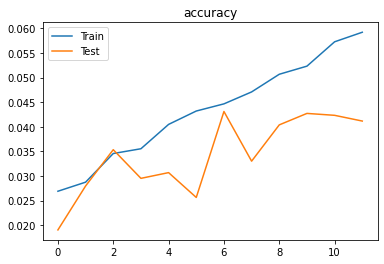

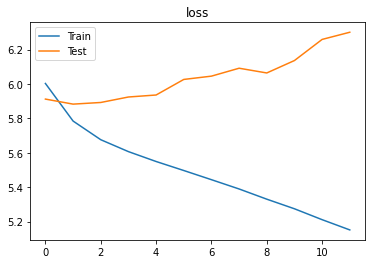

In [ ]:
acc = history.history['accuracy']
acc_v = history.history['val_accuracy']
loss = history.history['loss']
loss_v = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train')
plt.plot(epochs, acc_v, label='Test')
plt.legend()
plt.title('accuracy')

plt.figure()

plt.plot(epochs, loss, label='Train')
plt.plot(epochs, loss_v, label='Test')
plt.title('loss')
plt.legend()

plt.show()

Строим тест генератора

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
# seed_text = "She is my girl, I see in my hend"
next_words = 10
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_proba = model.predict(token_list, verbose=0)
    predicted_classes = np.argmax(predicted_proba, axis=1)

    output_word = tokenizer.index_word[predicted_classes[0]]
    seed_text += " " + output_word
    
print(seed_text)

[591, 18, 5, 352, 393]
[591, 18, 5, 352, 393, 4]
[591, 18, 5, 352, 393, 4, 5]
[591, 18, 5, 352, 393, 4, 5, 14]
[591, 18, 5, 352, 393, 4, 5, 14, 1]
[591, 18, 5, 352, 393, 4, 5, 14, 1, 76]
[591, 18, 5, 352, 393, 4, 5, 14, 1, 76, 4]
[591, 18, 5, 352, 393, 4, 5, 14, 1, 76, 4, 19]
[591, 18, 5, 352, 393, 4, 5, 14, 1, 76, 4, 19, 19]
[591, 18, 5, 352, 393, 4, 5, 14, 1, 76, 4, 19, 19, 19]
Help me Obi Wan Kenobi, you're my only hope of my love and see of thee thee thee thee


In [ ]:
predicted_proba

array([[1.08483798e-16, 1.97950867e-04, 1.02451153e-03, 1.35501334e-03,
        1.06158608e-03, 3.28088441e-04, 9.83300735e-04, 7.11406639e-04,
        2.26969336e-04, 1.30072905e-04, 1.10413966e-04, 5.11205544e-05,
        7.26931321e-05, 4.32131492e-06, 1.08675349e-05, 4.91226019e-05,
        1.28818783e-06, 1.12019341e-04, 1.96646750e-02, 9.73623455e-01,
        4.16756757e-06, 2.55414398e-06, 6.72046099e-06, 3.62249812e-05,
        9.69875618e-05, 1.94200748e-05, 2.80466338e-07, 2.20677698e-08,
        2.41364287e-05, 3.61131897e-05, 9.72538965e-06, 2.51273559e-06,
        6.41862516e-06, 3.48135609e-06, 1.42304259e-06, 1.59467163e-06,
        9.34986275e-08, 9.06648552e-08, 1.75013085e-07, 6.31925801e-08,
        1.15306530e-05, 5.02968805e-06, 1.37045875e-09, 1.65280767e-06,
        1.55684361e-07, 1.28950421e-06, 1.14142409e-07, 1.00437468e-07,
        4.46692979e-07, 1.17891530e-09, 2.73164620e-08, 3.39431108e-06,
        5.81108957e-08, 7.91214916e-09, 5.38161871e-09, 1.643705

#### Алиса в стране чудес

В задачу нейросети будет входить обучившись на тексте Алиса в стране чудес и начать генерировать текст, похожий на тот, что можно встретить в этой книге. Также в этом примере будет использоваться GRU.

In [ ]:
!wget 'https://drive.google.com/uc?export=dowload&id=1JhmK85mRgyEYWhy-9td4rL9quV0peLEi' -O alice_in_wonderland.txt

--2022-02-19 16:46:22--  https://drive.google.com/uc?export=dowload&id=1JhmK85mRgyEYWhy-9td4rL9quV0peLEi
Resolving drive.google.com (drive.google.com)... 173.194.212.138, 173.194.212.113, 173.194.212.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pocna6d1156uesvkns89jgr7f6cd02ct/1645289175000/14904333240138417226/*/1JhmK85mRgyEYWhy-9td4rL9quV0peLEi?e=dowload [following]
--2022-02-19 16:46:22--  https://doc-0g-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pocna6d1156uesvkns89jgr7f6cd02ct/1645289175000/14904333240138417226/*/1JhmK85mRgyEYWhy-9td4rL9quV0peLEi?e=dowload
Resolving doc-0g-c0-docs.googleusercontent.com (doc-0g-c0-docs.googleusercontent.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to doc-0g-c0-docs.googleusercontent.com (doc-0g-c0-do

In [ ]:
import numpy as np
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.models import Sequential


# построчное чтение из примера с текстом 
with open("alice_in_wonderland.txt", 'rb') as f:
    lines = []
    for line in f:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)

text = " ".join(lines)
chars = set([c for c in text])
n_chars = len(chars)

In [ ]:
text

'project gutenbergs alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org title: alices adventures in wonderland author: lewis carroll posting date: june 25, 2008 [ebook #11] release date: march, 1994 last updated: october 6, 2016 language: english character set encoding: utf-8 *** start of this project gutenberg ebook alices adventures in wonderland *** alices adventures in wonderland lewis carroll the millennium fulcrum edition 3.0 chapter i. down the rabbit-hole alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, and what is the use of a book, thought alice without pictures or c

In [ ]:
chars

{' ',
 '!',
 '#',
 '$',
 '%',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '@',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [ ]:
# создание индекса символов и reverse mapping
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

In [ ]:
# для удобства выберете фиксированную длину последовательность 10 символов 
maxlen, step = 10, 1
input_chars, label_chars = [], []

# конвертация data в серии разных maxlen-length последовательностей
for i in range(0, len(text) - maxlen, step):
    input_chars.append(text[i: i + maxlen])
    label_chars.append(text[i + maxlen])

In [ ]:
input_chars[:10]

['project gu',
 'roject gut',
 'oject gute',
 'ject guten',
 'ect gutenb',
 'ct gutenbe',
 't gutenber',
 ' gutenberg',
 'gutenbergs',
 'utenbergs ']

In [ ]:
label_chars[:10]

['t', 'e', 'n', 'b', 'e', 'r', 'g', 's', ' ', 'a']

In [ ]:
# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), maxlen, n_chars))
y = np.zeros((len(input_chars), n_chars))

for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1

In [ ]:
input_chars[0]

'project gu'

In [ ]:
char2index['p'], char2index['r']

(19, 28)

In [ ]:
X[0, :2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# установка ряда метапареметров  для нейронной сети и процесса тренировки
batch_size = 128
hidden_size = 128
num_iterations = 25 # 25 должно быть достаточно
num_epochs = 1
num_preds = 100

In [ ]:
model = Sequential()
model.add(
    GRU(
        hidden_size,
        return_sequences=False,
        input_shape=(maxlen, n_chars),
        unroll=True
    )
)
model.add(Dense(n_chars, activation='softmax'))
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop")

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               70656     
                                                                 
 dense_10 (Dense)            (None, 55)                7095      
                                                                 
Total params: 77,751
Trainable params: 77,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(num_iterations):
    # для каждой итерации запуск передачи данных в модель 
    print()
    print("=" * 50)
    print(f'Итерация #: {iteration}')
    model.fit(X, y,
              batch_size=batch_size,
              epochs=num_epochs)

    # Select a random example input sequence
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print(f'Генерация из {test_chars}')
    print(test_chars, end="")
    for i in range(num_preds):

        # здесь one-hot encoding.
        X_test = np.zeros((1, maxlen, n_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred


Итерация #: 0
1241/1241 [==============================] - 16s 10ms/step - loss: 2.3047
Генерация из  baby--the
 baby--the the said the dore the said the dore the said the dore the said the dore the said the dore the said 
Итерация #: 1
1241/1241 [==============================] - 12s 9ms/step - loss: 1.9121
Генерация из alice appe
alice appersed the dore the dore the dore the dore the dore the dore the dore the dore the dore the dore the d
Итерация #: 2
1241/1241 [==============================] - 12s 9ms/step - loss: 1.7584
Генерация из ut i dont 
ut i dont the rate to the dore to the dore to the dore to the dore to the dore to the dore to the dore to the 
Итерация #: 3
1241/1241 [==============================] - 12s 9ms/step - loss: 1.6568
Генерация из alice dodg
alice dodget it was the dormouse of the dormouse of the dormouse of the dormouse of the dormouse of the dormou
Итерация #: 4
1241/1241 [==============================] - 21s 17ms/step - loss: 1.5812
Генерация из ve a look

## Домашнее задание
1. Попробуйте обучить нейронную сеть RNN/LSTM/GRU на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). 

2. Опишите, какой результат вы получили? Что помогло вам улучшить ее точность?

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1xwXieDVy1RKdfiJ6am_nNWp6XhAYdhNb' -O airline-passengers.csv

--2022-02-19 16:54:14--  https://drive.google.com/uc?export=download&id=1xwXieDVy1RKdfiJ6am_nNWp6XhAYdhNb
Resolving drive.google.com (drive.google.com)... 108.177.12.138, 108.177.12.139, 108.177.12.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.12.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i38u23hgjsmk1ajq142d1s6059t5fp3q/1645289625000/14904333240138417226/*/1xwXieDVy1RKdfiJ6am_nNWp6XhAYdhNb?e=download [following]
--2022-02-19 16:54:15--  https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i38u23hgjsmk1ajq142d1s6059t5fp3q/1645289625000/14904333240138417226/*/1xwXieDVy1RKdfiJ6am_nNWp6XhAYdhNb?e=download
Resolving doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-08-c0-docs.googleusercontent.com (doc-08-c0-doc

In [ ]:
pd.read_csv('/content/airline-passengers.csv')

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Дополнительные материалы

1. [Оригинальная научная статья по LSTM](https://www.bioinf.jku.at/publications/older/2604.pdf)
2. [Оригинальная научная статья по GRU](https://arxiv.org/abs/1406.1078)
3. [Введение в RNN Рекуррентные Нейронные Сети для начинающих](https://python-scripts.com/recurrent-neural-network)
4. [Введение в RNN](https://youtu.be/EBP3pqPeN8I)
5. [Simple LSTM](https://nicodjimenez.github.io/2014/08/08/lstm.html)
6. [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
7. [Illustrated Guide to LSTM's and GRU's: A step by step explanation](https://youtu.be/8HyCNIVRbSU)


## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Николенко, Кадурин, Архангельская: Глубокое обучение. Погружение в мир нейронных сетей 2018</li>
    <li>Aurélien Géron - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2019</li>
    <li>https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</li>
    <li>https://github.com/llSourcell/recurrent_neural_net_demo</li>
    
</ol>

## Определения

**Рекуррентные нейронные сети (Recurrent neural network, RNN)** — вид нейронных сетей, где связи между элементами образуют направленную последовательность. Благодаря этому появляется возможность обрабатывать серии событий во времени или последовательные пространственные цепочки.

**Долгая краткосрочная память (Long short-term memory, LSTM)** — разновидность архитектуры рекуррентных нейронных сетей, предложенная в 1997 году Зеппом Хохрайтером и Юргеном Шмидхубером. В отличие от традиционных рекуррентных нейронных сетей, LSTM-сеть хорошо приспособлена к обучению на задачах классификации, обработки и прогнозирования временных рядов в случаях, когда важные события разделены временными лагами с неопределённой продолжительностью и границами.

**Управляемые рекуррентные блоки (Gated Recurrent Units, GRU)** — механизм gate'ов для рекуррентных нейронных сетей, представленный в 2014 году. Было установлено, что его эффективность при решении задач моделирования музыкальных и речевых сигналов сопоставима с использованием долгой краткосрочной памяти (LSTM). По сравнению с LSTM у данного механизма меньше параметров, т.к. отсутствует выходной gate.

**RNN, LSTM, GRU**
<img src='https://www.mdpi.com/energies/energies-13-00147/article_deploy/html/images/energies-13-00147-g008.png'>


**Механизм внимания (Attention)** — техника используемая в рекуррентных нейронных сетях (сокр. RNN) и сверточных нейронных сетях (сокр. CNN) для поиска взаимосвязей между различными частями входных и выходных данных.

<img src='https://drive.google.com/uc?export=view&id=1a72Ake6Ai2SdkZ9cQpqmq6-ebjblcQ34' width=450>

**Bidirectional LSTM**

Двунаправленные рекуррентные нейронные сети (BRNN) соединяют два скрытых слоя противоположных направлений с одним и тем же выходом. При такой форме генеративного глубокого обучения выходной слой может получать информацию из прошлого (назад) и будущего (вперед) состояний одновременно.


<img src='https://drive.google.com/uc?export=view&id=1kCGsUWhUjIoIAquvE7FjaAbYjAQdsyW7' width=550>